In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Here we are importing the Dataset 
"""
The Dataset here used will be he fraud detection dataset in which the information is stored regrding which credit car 
transactions were fraud and which were not 
"""

dataset = pd.read_csv("Credit_card_fraud_data.csv")

dataset.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19.0,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17.0,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14.0,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14.0,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23.0,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [71]:
# now getting what is the Shape of dataset and what is the datatype of each column

print("No of Rows :",dataset.shape[0])
print("No of Columns :",dataset.shape[1])
print()
print("Datatypes of each column are given Below : ")
dataset.dtypes

No of Rows : 100000
No of Columns : 16

Datatypes of each column are given Below : 


Transaction ID             object
Date                       object
Day of Week                object
Time                      float64
Type of Card               object
Entry Mode                 object
Amount                     object
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
dtype: object

In [72]:
# Now we will ge those rows who have fraud value 0 like which were not fraud

no_fraud = dataset.loc[dataset["Fraud"] == 0]

no_fraud.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19.0,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17.0,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14.0,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14.0,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
5,#3446 698,13-Oct-20,Tuesday,20.0,MasterCard,Tap,£30,POS,Children,India,India,India,M,48.4,Monzo,0


In [73]:
# Now we will get the data of fraud transactions 

fraud = dataset.loc[dataset["Fraud"] == 1]

fraud

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,#2771 031,13-Oct-20,Tuesday,23.0,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
11,#3474 192,14-Oct-20,Wednesday,1.0,MasterCard,PIN,£106,POS,Fashion,Russia,Russia,United Kingdom,F,48.7,Metro,1
16,#3513 029,13-Oct-20,Tuesday,0.0,MasterCard,CVC,£25,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
37,#3316 175,14-Oct-20,Wednesday,3.0,MasterCard,PIN,£5,ATM,Services,China,China,United Kingdom,F,62.8,Barlcays,1
42,#2617 497,14-Oct-20,Wednesday,4.0,Visa,PIN,£206,POS,Children,United Kingdom,India,United Kingdom,M,46.3,Barclays,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,#3602 464,14-Oct-20,Wednesday,1.0,MasterCard,PIN,£30,ATM,Fashion,China,China,United Kingdom,M,33.9,Barclays,1
99954,#3257 939,13-Oct-20,Tuesday,12.0,MasterCard,CVC,£386,Online,Products,China,China,United Kingdom,M,56.4,Barclays,1
99969,#3249 369,13-Oct-20,Tuesday,18.0,Visa,PIN,£21,ATM,Subscription,United Kingdom,USA,United Kingdom,M,50.1,Barclays,1
99974,#2596 607,13-Oct-20,Tuesday,9.0,MasterCard,CVC,£211,Online,Subscription,China,China,United Kingdom,F,44.2,Barclays,1


No of transactions having fraud are :  7195
No of transactions not having fraud are :  92805


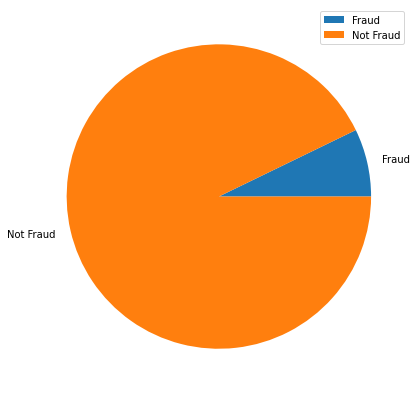

In [74]:
# Now we will get how many transactions are recorded as fraud and how many were not recordes as fraud 

print("No of transactions having fraud are : ",fraud.shape[0])
print("No of transactions not having fraud are : ",no_fraud.shape[0])

plt.figure(figsize=(25,7))
plt.pie([fraud.shape[0],no_fraud.shape[0]],labels = ["Fraud","Not Fraud"])
plt.legend()
plt.show()



Highest Fraud were recorded in Transaction Type of:  Online


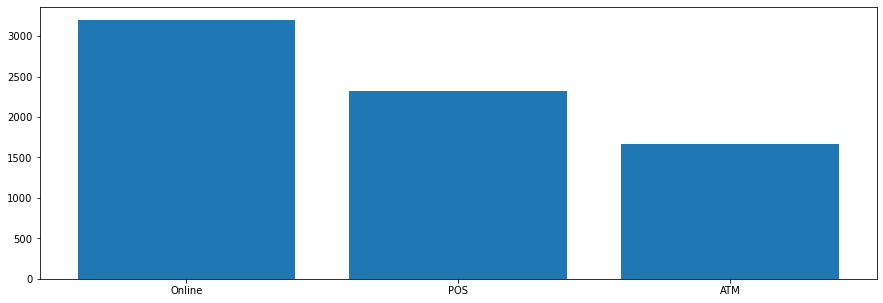

In [75]:
import numpy as np
# Now we will Analyze which type of transaction have most frauds recorded

fraud_values = dict(dataset.loc[dataset["Fraud"] == 1,"Type of Transaction"].value_counts())


x=list(fraud_values.keys())
y=list(fraud_values.values())

print("Highest Fraud were recorded in Transaction Type of: ",x[y.index(np.max(list(fraud_values.values())))])

plt.figure(figsize=(15,5))

plt.bar(x,y)
plt.show()




In [76]:
""" Now we will split the data for training and testing the model 
    
    then we will apply Knn Model for and create a predictor which will predict future values that are these transactions
    lookig like fraud or not fraud 
"""
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#for splitting the dataset we will use sklearn traintest split funtion

# Firstly, We will drop the rows containing null values 
dataset = dataset.dropna()
# Secondly,  We will drop the columns which are making no impact on our Model 
dataset = dataset.drop(columns=["Day of Week","Transaction ID","Date"],axis=1)

x=dataset.iloc[:,:-1]


x=pd.get_dummies(x)
y=dataset.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3)


Now Below Here We are Creating Our KNN Modle Which will be used to predict which Transactions are fraud and which are not

In [77]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [78]:
#Now we will get the accuracy of our model
from sklearn.metrics import accuracy_score

acc = accuracy_score(pred,y_test)
print("Accuracy of our model is: ",acc*100)

Accuracy of our model is:  96.06254584250183


In [79]:
#Now cross validating our model using Kfolds
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 


Cross Validation Scores:  [0.96139228 0.96254251 0.96204051 0.96164041 0.96349087]
Average CV Score:  0.9622213159811256
Number of CV Scores used in Average:  5


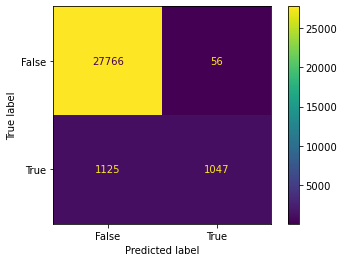

In [80]:
# Now we plot the confusion matrix to see how much our model is accurate 
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 